# Data Science Mod 3 Project:  Hypothesis Testing in Python with NYC Traffic Collision Data
#### June 11, 2019
* Linh Nguyen, David Haase 
* Flatiron School (nyc-mhtn-ds-0422019)

## Project Description
This project was a exercise in hyphothesis testing for Module 3 of the Data Science Track of the Flatiron School for the nyc-mhtn-ds-04222019 cohort.  This project illustrates four hypotheses that we made on the data, and how we used ANOVA, t-Tests and chi-square analyses in Python to measure the significance of these hypotheses. 

### Assignment
The goal of this project is to test our ability to gather information from a real-world database and use our knowledge of statistical analysis and hypothesis testing to generate analytical insights that can be meaningful to the company/stakeholder.

#### Our Hypotheses on NYC Traffic Data
1. Do moon phases have an effect on daily collision rates in NYC?
1. Does the day of the week have an effect on daily collision rates in NYC?
1. If so, which day has the most on average?
1. How does the mortality rate of traffic collisions in NYC compare to the national average?

### Data Sources
#### NYC Traffic Collision Data
NYC OpenData: NYPD Motor Vehicle Collisions

This is a breakdown of every collision in NYC by location and injury. This data is collected because the NYC Council passed Local Law #11 in 2011. Each record represents a collision in NYC by city, borough, precinct and cross street. This data can be used by the public to see how dangerous/safe intersections are in NYC. The information is presented in pdf and excel format to allow the casual user to just view the information in the easy to read pdf format or use the excel files to do a more in-depth analysis.

* https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95

#### Moon Phase Data
The United States Naval Observatory (USNO)
3450 Massachusetts Ave, NW, Washington, DC 20392-5420

USNO strengthens national security and critical infrastructure by serving as DoD’s authoritative source for the positions and motion of celestial bodies, motions of the Earth, and precise time. USNO provides tailored products, performs relevant research, develops leading edge technologies and instrumentation, and operates state of the art systems in support of the U.S. Navy, DoD, Federal Agencies, international partners, and the general public.
* https://www.usno.navy.mil/USNO/

#### National Crash Data
National Highway Traffic Safety Administration

4 NHTSA’s National Center for Statistics and Analysis
1200 New Jersey Avenue SE., Washington, DC 20590
This fact sheet contains information on fatal motor vehicle crashes and fatalities based on data from the Fatality Analysis Reporting System (FARS). FARS is a census of fatal crashes in the 50 States, the District of Columbia, and Puerto Rico (Puerto Rico is not included in U.S. totals). 
* https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812580 

### Deliverables
#### Build Files:  Jupyter Notebooks
* [ds-mod3-final-nguyen-haase.ipynb] Start with this notebook to build collision data and moon data.

#### Data Files
* Collision Data. Collision data are not hosted here because the file is 331 MB of csv data, but you can pull them from https://data.cityofnewyork.us/resource/qiz3-axqb.json.  For the purposes of this notebook, there were saved locally as in the file: '../../Datasets/NYPD_Motor_Vehicle_Collisions.csv' 
* Moon Phases.  Moon phases from the Navy site used in this notebook are available in this repository referenced in teh file, moonphasedf.csv:

#### Conclusion and Presentation
* https://docs.google.com/presentation/d/1STg8PRsdN8YOPfCLKbWTnA2Nx6alV7CNDdMPofqsugk/edit?usp=sharing


## Code
### Imported Libraries and Definitions
If there is an important clarification that you need to make about any of the libraries imported, now is the right time to do so.

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import json
import datetime

#### Collision Data

In [50]:
# This file is saved locally from the Navy site because it is > 300 MB. 
# The Navy site is here: https://data.cityofnewyork.us/resource/qiz3-axqb.json

data_file = '../../Datasets/NYPD_Motor_Vehicle_Collisions.csv'
df = pd.read_csv(data_file)

/Users/davidhaase/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleaning
### Summarize the shape of collision data from NYC
`df.shape`
* (1507923, 29)
* 29 features (columns)
* 1,507,923 collisions (rows)



`df.info()`
* RangeIndex: 1507923 entries, 0 to 1507922
* Data columns (total 29 columns)
* dtypes: float64(4), int64(7), object(18)
* memory usage: 333.6+ MB

`DATE                             1507923 non-null object
TIME                             1507923 non-null object
BOROUGH                          1055432 non-null object
ZIP CODE                         1055253 non-null object
LATITUDE                         1319709 non-null float64
LONGITUDE                        1319709 non-null float64
LOCATION                         1319709 non-null object
ON STREET NAME                   1217162 non-null object
CROSS STREET NAME                1020629 non-null object
OFF STREET NAME                  198606 non-null object
NUMBER OF PERSONS INJURED        1507906 non-null float64
NUMBER OF PERSONS KILLED         1507892 non-null float64
NUMBER OF PEDESTRIANS INJURED    1507923 non-null int64
NUMBER OF PEDESTRIANS KILLED     1507923 non-null int64
NUMBER OF CYCLIST INJURED        1507923 non-null int64
NUMBER OF CYCLIST KILLED         1507923 non-null int64
NUMBER OF MOTORIST INJURED       1507923 non-null int64
NUMBER OF MOTORIST KILLED        1507923 non-null int64
CONTRIBUTING FACTOR VEHICLE 1    1504001 non-null object
CONTRIBUTING FACTOR VEHICLE 2    1306911 non-null object
CONTRIBUTING FACTOR VEHICLE 3    97164 non-null object
CONTRIBUTING FACTOR VEHICLE 4    20199 non-null object
CONTRIBUTING FACTOR VEHICLE 5    5142 non-null object
UNIQUE KEY                       1507923 non-null int64
VEHICLE TYPE CODE 1              1503118 non-null object
VEHICLE TYPE CODE 2              1263185 non-null object
VEHICLE TYPE CODE 3              126564 non-null object
VEHICLE TYPE CODE 4              48051 non-null object
VEHICLE TYPE CODE 5              10256 non-null object`



### Drop unnecessary columns

In [51]:
drop_columns = ['LOCATION', 'BOROUGH', 'LATITUDE', 'LONGITUDE', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'CONTRIBUTING FACTOR VEHICLE 1', 'ZIP CODE', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5']
df = df.drop(drop_columns, axis=1)

In [52]:
df.isna().sum()

DATE                              0
TIME                              0
NUMBER OF PERSONS INJURED        17
NUMBER OF PERSONS KILLED         31
NUMBER OF PEDESTRIANS INJURED     0
NUMBER OF PEDESTRIANS KILLED      0
NUMBER OF CYCLIST INJURED         0
NUMBER OF CYCLIST KILLED          0
NUMBER OF MOTORIST INJURED        0
NUMBER OF MOTORIST KILLED         0
dtype: int64

### NaNs
`DATE                              0
TIME                              0
NUMBER OF PERSONS INJURED        17
NUMBER OF PERSONS KILLED         31
NUMBER OF PEDESTRIANS INJURED     0
NUMBER OF PEDESTRIANS KILLED      0
NUMBER OF CYCLIST INJURED         0
NUMBER OF CYCLIST KILLED          0
NUMBER OF MOTORIST INJURED        0
NUMBER OF MOTORIST KILLED         0
dtype: int64
`
#### Drop NaNs
Relative to the total 1.5M collisions, the number of collisions for the two features with NaNs is low.  Let's just get rid of them.

In [53]:
df = df.dropna()
df.isna().sum()

DATE                             0
TIME                             0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
dtype: int64

### Convert Data Types
#### Dates
(ATTENTION: the code below will take a few minutes)

In [54]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['TIME'] = pd.to_datetime(df['TIME'])

####  Floats

In [55]:
df['NUMBER OF PERSONS INJURED'] = df['NUMBER OF PERSONS INJURED'].astype(int)
df['NUMBER OF PERSONS KILLED'] = df['NUMBER OF PERSONS KILLED'].astype(int)

### Saving data to file locally
The section below is commented out on purpose.  But if desired, can be used a breakpoint for saving cleaned data to save time in development.

In [74]:
##############################
# BREAKPOINT — Save to disk (json)
# data_file = 'data/cleaned_traffic_data.json'
# df.to_json(data_file)


# Load from disk (json)
# If you just want to start with the clean data, start here.
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# import json

# data_file = 'data/cleaned_traffic_data.json'
# with open(data_file) as json_file:  
#     data = json.load(json_file)  
#     df = pd.DataFrame(data)

## Data Engineering
### Visualize daily collision totals

In [75]:
collisions_by_date = df['DATE'].value_counts().reset_index()
collisions_by_date.describe()

,DATE
count,2528.000000
mean,596.474288
std,100.701513
min,188.000000
25%,528.000000
50%,598.000000
75%,662.000000
max,1161.000000


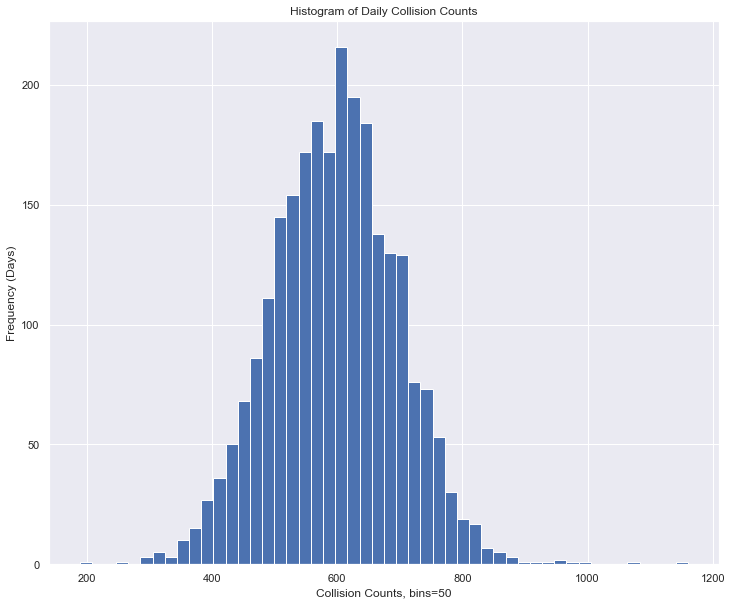

In [76]:
plt.hist(collisions_by_date['DATE'], bins=50)
plt.xlabel('Collision Counts, bins=50')
plt.ylabel('Frequency (Days)')
plt.title('Histogram of Daily Collision Counts')
plt.savefig('data/histogram-collisions-per-day.png')

### Convert to days of the week

In [77]:
weekdays = df['DATE'].value_counts().reset_index()
weekdays['day_of_week'] = weekdays['index'].dt.day_name()
weekdays.drop('index', axis=1, inplace=True)

In [78]:
weekdays = weekdays.rename(index=str, columns={"DATE": "collisions"})

## Hypothesis Testing
### T2 Days of the Week (ANOVA)—Does the day of the weekday have an effect on the number of collisions?
* __Null Hypothesis (H<sub>0</sub>)__:  The day of a weekday does not have an effect on the number of collisions
* __Alternative Hypothesis (H<sub>1</sub>)__: The day of a weekday _does_ have an effect on the number of collisions

#### Box plots for each day of the week

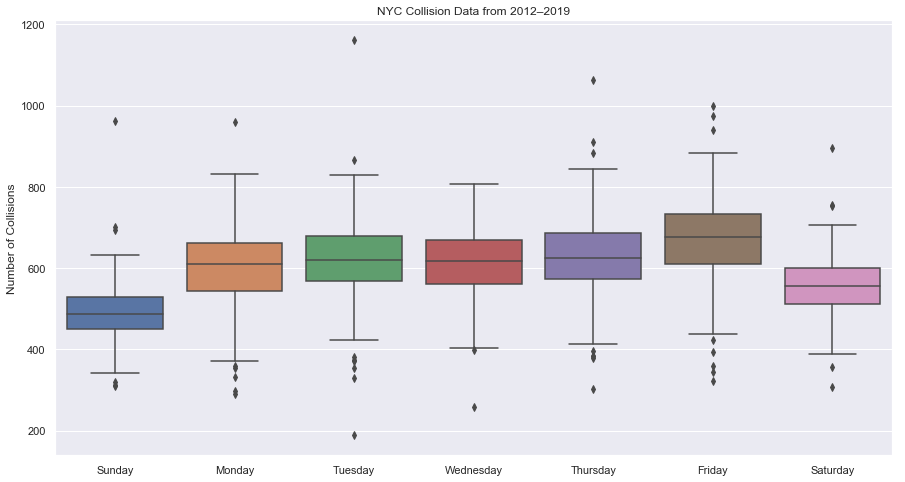

In [61]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x="day_of_week", y="collisions", data=weekdays, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xlabel('')
plt.ylabel('Number of Collisions')
plt.title('NYC Collision Data from 2012–2019')
plt.savefig('images/boxplot-collisions-by-day.png')

#### ANOVA results from OLS

In [62]:
formula = 'collisions ~ C(day_of_week)'
lm = ols(formula, weekdays).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
C(day_of_week),7.366846e+06,6.0,169.522588,1.872246e-181
Residual,1.825894e+07,2521.0,NaN,NaN


### T3 Build Day Pair Boxplots
* Tuesday vs Thursday
* Saturday vs Sunday
* Friday vs Sunday

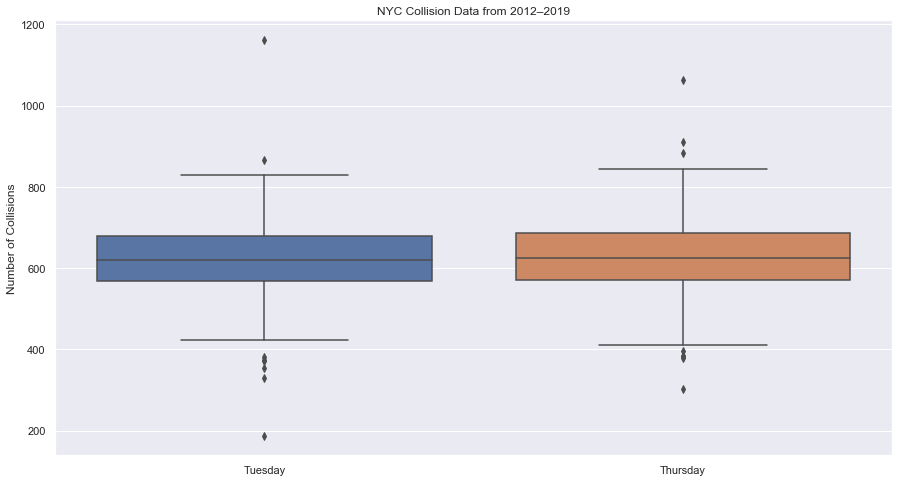

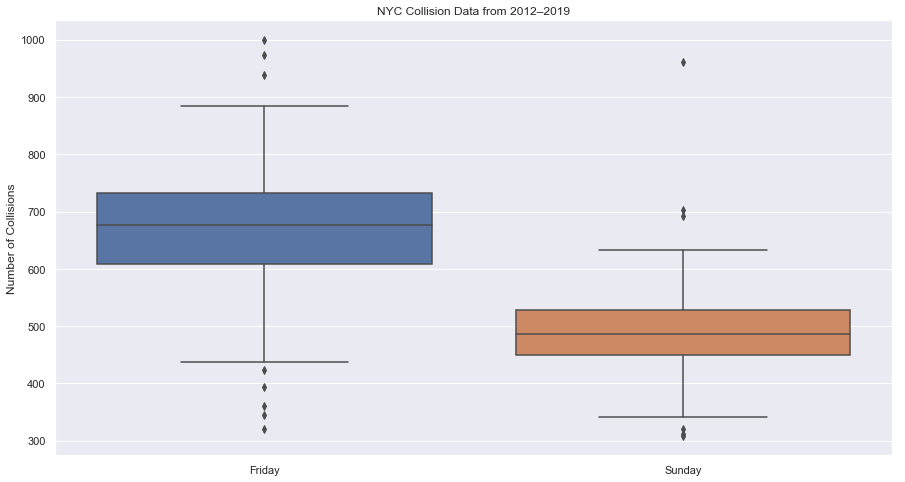

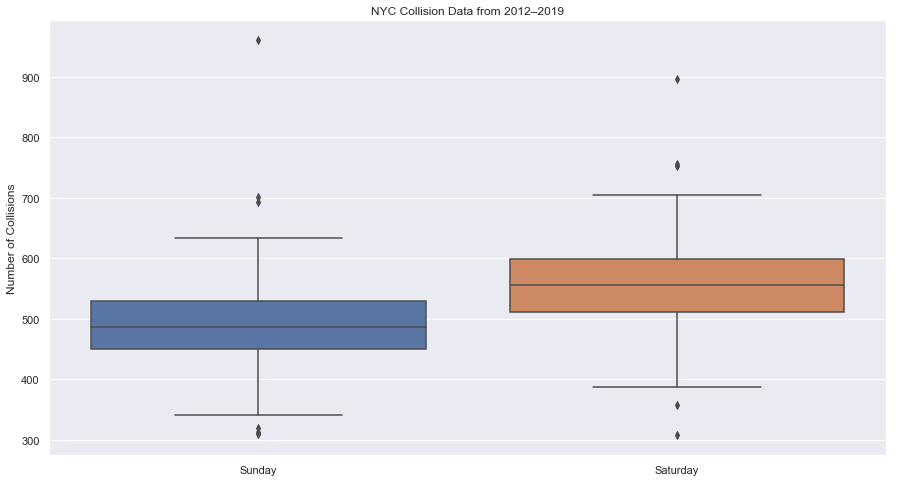

In [79]:
def boxplot_daypairs(pairs, df):
    for pair in pairs:
        filename = 'images/boxplots/boxplot-collisions-by-' + pair[0] + '-' + pair[1] + '.png'
        pair_df = df[(df['day_of_week'] == pair[0]) | (df['day_of_week'] == pair[1])]
        fig = plt.figure(figsize=(15,8))
        sns.boxplot(x="day_of_week", y="collisions", data=pair_df)
        plt.xlabel('')
        plt.ylabel('Number of Collisions')
        plt.title('NYC Collision Data from 2012–2019')
        plt.savefig(filename)
    
    
day_pairs = [['Thursday', 'Tuesday'], ['Friday', 'Sunday'], ['Saturday', 'Sunday']]
boxplot_daypairs(day_pairs, weekdays)

### T3 Build Day Pair Historgrams and Calculate t-stat, p-value and Cohen's-d
* Tuesday vs Thursday
* Saturday vs Sunday
* Friday vs Sunday

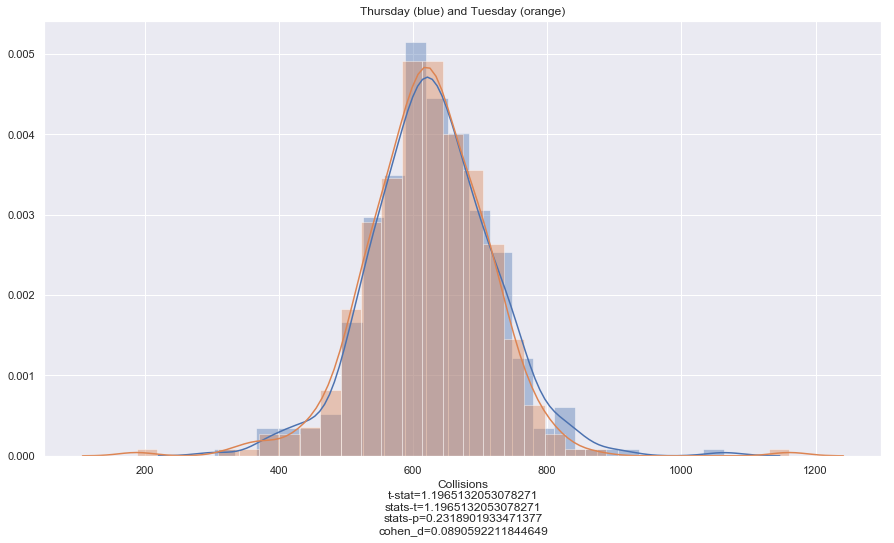

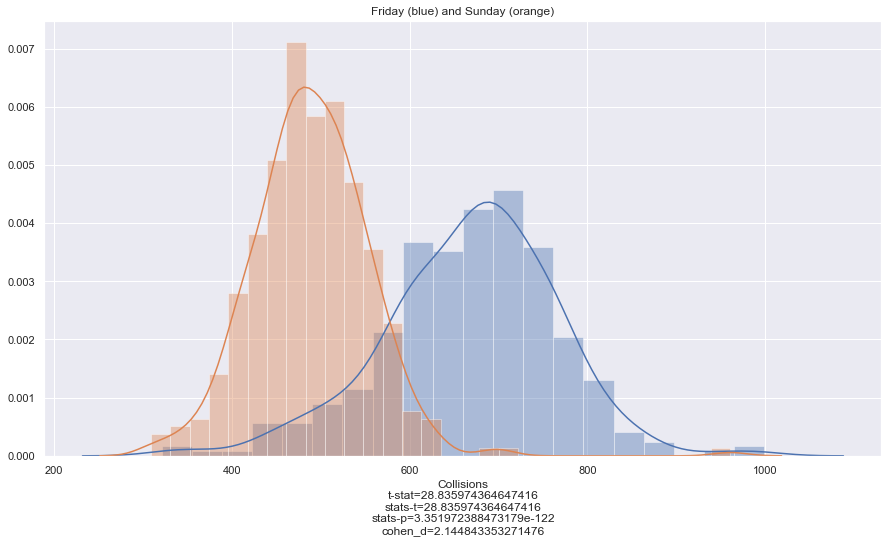

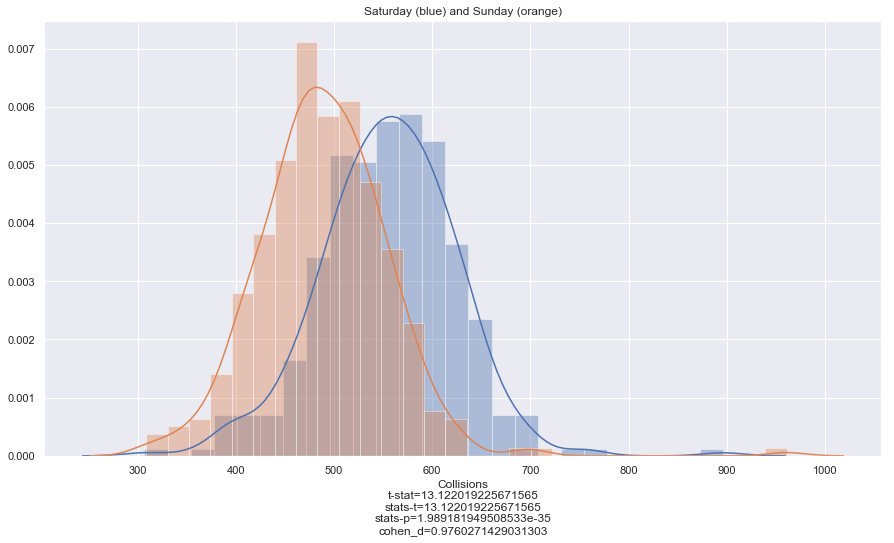

In [81]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)

def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)

def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    pool_var = pooled_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    return num / denom

def distplot_daypairs(pairs, df):
    for pair in pairs:
        filename = 'images/distplots/displot-collisions-by-' + pair[0] + '-' + pair[1] + '.png'
        day1 = df.loc[df['day_of_week'] == pair[0], 'collisions']
        day2 = df.loc[df['day_of_week'] == pair[1], 'collisions']
        t_stat = twosample_tstatistic(day1, day2)
        (stats_t, stats_p) = stats.ttest_ind(day1, day2)
        cd = Cohen_d(day1, day2)
        fig = plt.figure(figsize=(15,8))
        sns.set(rc={'figure.figsize':(12,10)})
        sns.distplot(day1)
        sns.distplot(day2)
        plt.xlabel('Collisions\nt-stat={}\nstats-t={}\nstats-p={}\ncohen_d={}'.format(t_stat, stats_t, stats_p, cd))
        plt.ylabel('')
        plt.title(pair[0] + ' (blue) and ' + pair[1] + ' (orange)')
        plt.savefig(filename)
    
    
day_pairs = [['Thursday', 'Tuesday'], ['Friday', 'Sunday'], ['Saturday', 'Sunday']]
distplot_daypairs(day_pairs, weekdays)

### T3 Visualize Effect
* Tuesday vs Thursday
* Saturday vs Sunday
* Friday vs Sunday

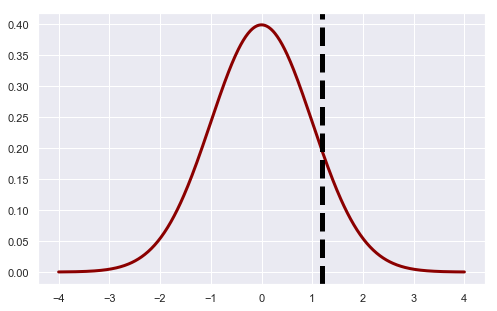

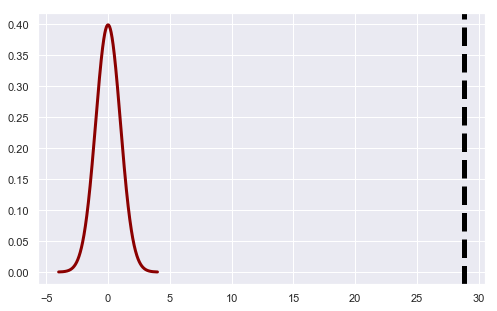

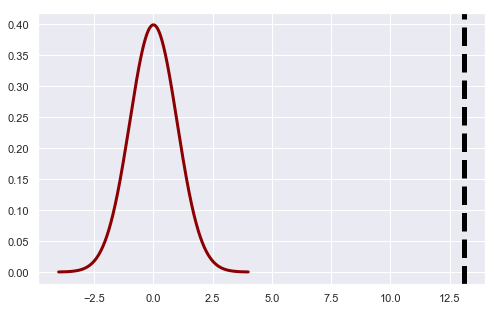

In [65]:
def visualize_t(t_stat, n_control, n_experimental):

    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate points on the x axis between -4 and 4:
    xs = np.linspace(-4, 4, 500)

    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(t_stat, color='black', linestyle='--', lw=5)
#     ax.axvline(-t_stat, color='black', linestyle='--', lw=5)
    plt.show()
    return None

def visualize_t_daypairs(pairs, df):
    for pair in pairs:
        filename = 'images/distplots/displot-collisions-by-' + pair[0] + '-' + pair[1] + '.png'
        day1 = df.loc[df['day_of_week'] == pair[0], 'collisions']
        day2 = df.loc[df['day_of_week'] == pair[1], 'collisions']
        t_stat = twosample_tstatistic(day1, day2)
        visualize_t(t_stat, len(day1), len(day2))
    

visualize_t_daypairs(day_pairs, weekdays)

## T1 Moon Phases
The code below is somewhat redundant to the project because the original moon phase analysis was down outside this notebook, (see Top of this notebook).  However, we rebuilt the moonphase algorithms here in a parameterized way so that we could consider alternative distributions of moon phases.  

The original moon phase data came divided up into repeating four phases.  Counter to our anecdotal intuitions, each phase was defined by a moment in time _at its apex_.  We did not feel this capture the more _human_ notion of full moon, which gave as an offset +/- from the apex. 

This turned out to be quite complicated.

In any case, we tested three distributions of moon phase definitions:
* Even quarters with each phase starting at its apex
* Even quarters with the each phase starting at 45-degrees left of its apex
* Uneven quarters in which Full Moon and New Moon were roughly 1-day before and after its apex, and everthing else was a waxing or wane.



### Interpreting Moon Phase Data
####  Phase Interpretation 1: Full Moon and New Moon as notional "days", evetying else is waxing or waning

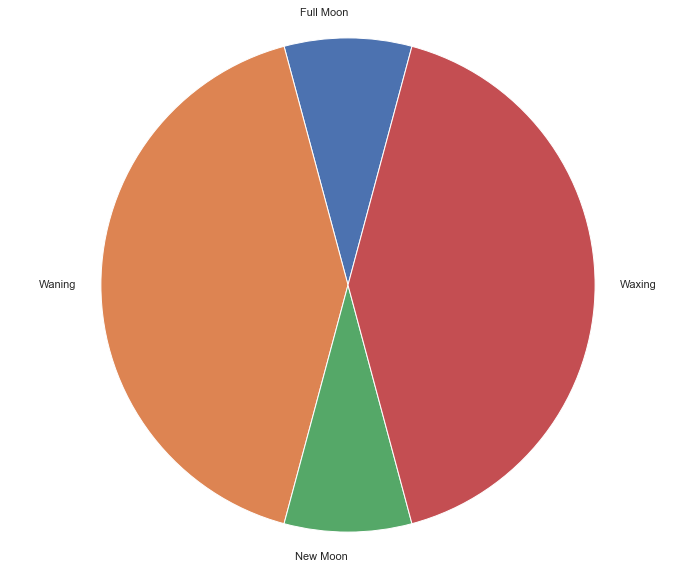

In [97]:
labels = 'Full Moon', 'Waning', 'New Moon', 'Waxing'
sizes = [1, 5, 1, 5]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
ax1.pie(sizes, labels=labels, startangle=75)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

####  Phase Interpretation 2: Even quarters with phase start at its apex (unintuitive)

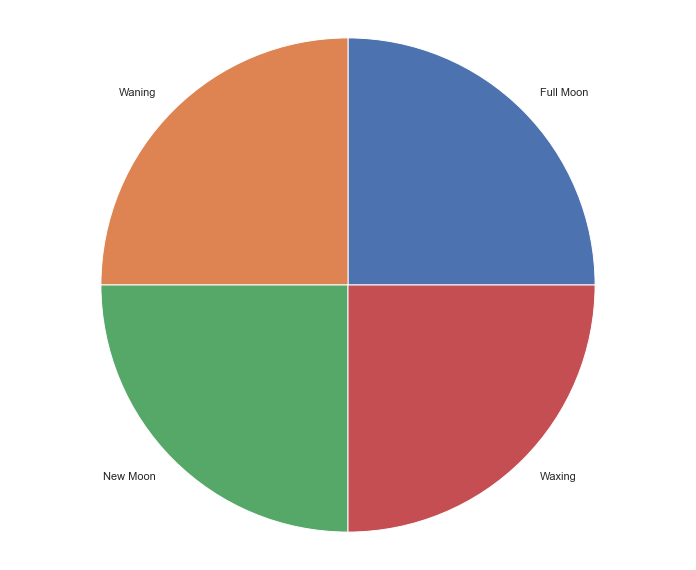

In [94]:
sizes = [3, 3, 3, 3,]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
ax1.pie(sizes, labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

####  Phase Interpretation 3: Even quarters with phase start at its apex (possibly most intuitive)

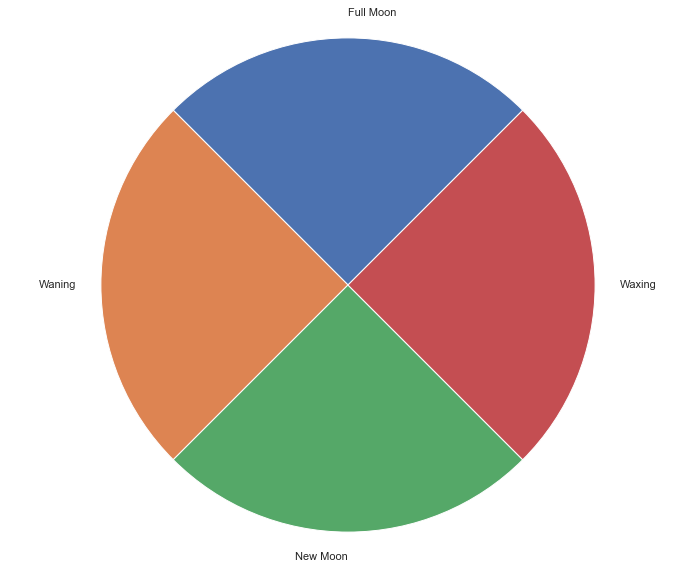

In [98]:
sizes = [3, 3, 3, 3,]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=45)
ax1.pie(sizes, labels=labels, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Indexing Moon Phase Chronologically
It was important to build a model of moon phases that would accept an arbitrary date and return the appropriate phase.  This was not trivial.
#### Helper methods defined first

In [82]:
filename = 'moonphasedf.csv'

def build_phases(filename):
    phases = {}
    f = open(filename)
    lines = f.readlines()
    f.close() 
    
    for i in range(1,len(lines)):
        try:
            date = datetime.datetime.strptime(lines[i].split(',')[1], '%Y %b %d')
            value = lines[i].split(',')[2]
        except Exception as e:
            print(e)
            continue

        if value not in phases:
            phases[value] = []
        phases[value].append(date)
        
    f.close()  
    
    return phases

def build_phases_from_string(filename):
    phases = {}
    f = open(filename)
    lines = f.readlines()
    f.close() 
    
    one_day = datetime.timedelta(days=0)
    six_days = datetime.timedelta(days=0)
    
    for i in range(1,len(lines)):
        try:
            date, value, time = lines[i].split(',')[1], lines[i].split(',')[2], lines[i].split(',')[3]
            yyyy, mmm, dd = date.split(' ')[0], date.split(' ')[1], date.split(' ')[2]
            hh, mm = time.split(':')[0], time.split(':')[1]
            mm = mm.strip()
            timestamp = datetime.datetime.strptime(date + ' ' + time, '%Y %b %d %H:%M\n')

        except Exception as e:
            print(e)
            continue
        
        adjusted_time = timestamp - one_day if ((value == 'Full Moon') | (value == 'New Moon')) else timestamp - six_days
        s = adjusted_time.strftime('%Y %b %d %H:%M\n')
#         s = timestamp.strftime('%Y %b %d %H:%M\n')
        yyyy, mmm, dd, time = s.split(' ')[0], s.split(' ')[1], s.split(' ')[2], s.split(' ')[3]
        hh, mm = time.split(':')[0], time.split(':')[1]
        mm = mm.strip()
        
        if yyyy not in phases:
            phases[yyyy] = {}
        if mmm not in phases[yyyy]:
            phases[yyyy][mmm] = {}
        if dd not in phases[yyyy][mmm]:
            phases[yyyy][mmm][dd] = {}
        if hh not in phases[yyyy][mmm][dd]:
            phases[yyyy][mmm][dd][hh] = {}
        
        value = 'Waxing' if value == 'First Quarter' else value
        value = 'Waning' if value == 'Last Quarter' else value
        phases[yyyy][mmm][dd][hh][mm] = value
        

    f.close()  
    
    return phases

def get_previous_phase(phase, direction):
    phase_strings = ['New Moon', 'Waxing', 'Full Moon', 'Waning']
    i = phase_strings.index(phase)
    return phase_strings[(i+direction)%4]

def get_phase_by_hour(dict_):
    minutes = list(dict_.keys())[0]
    return dict_[minutes]

def get_phase_by_day(dict_):
    hour = list(dict_.keys())[0]
    return get_phase_by_hour(dict_[hour])
    

def get_phase_from_day(day_string):
    try:
        s = day_string.strftime('%Y %b %d %H:%M\n')
        yyyy, mmm, dd, time = s.split(' ')[0], s.split(' ')[1], s.split(' ')[2], s.split(' ')[3]
        hh, mm = time.split(':')[0], time.split(':')[1]
        mm = mm.strip()
    except Exception as e:
        print(e)
        
    phase = 'No Phase'
    if yyyy in phases:
        if mmm in phases[yyyy]:
            if dd in phases[yyyy][mmm]:
                if hh in phases[yyyy][mmm][dd]:
                    if mm in phases[yyyy][mmm][dd][hh]:
                        phase = phases[yyyy][mmm][dd][hh][mm]
                    else:
                        minutes = list(phases[yyyy][mmm][dd][hh].keys())[0]
                        if int(mm) > int(minutes):
                            phase = phases[yyyy][mmm][dd][hh][minutes]
                        else:
                            phase = get_previous_phase(phases[yyyy][mmm][dd][hh][minutes], -1)
                else:
                    hours = list(phases[yyyy][mmm][dd].keys())[0]
                    phase = get_phase_by_hour(phases[yyyy][mmm][dd][hours])
                    if int(hh) < int(hours):
                        phase = get_previous_phase(phase, -1)
                    else:
                        print('hours', hh)
            else:
                days = list(phases[yyyy][mmm].keys())
                for day in days:
                    max_day = day
                    if int(day) > int(dd):
                        phase = get_phase_by_day(phases[yyyy][mmm][day])
                        phase = get_previous_phase(phase, -1)
                        break
                if int(dd) > int(max_day):
                    phase = get_phase_by_day(phases[yyyy][mmm][max_day])
        else:
            print('Month', mmm)
    else:
        print('year', yyyy)
                                    
    return phase



Now build the phase models

In [99]:
phases = build_phases_from_string(filename) 

And plot the dataframe into a boxplot.

In [100]:
moondays = df['DATE'].value_counts().reset_index()
moondays['phase'] = moondays['index'].map(lambda x: get_phase_from_day(x))
moondays.drop('index', axis=1, inplace=True)
moondays = moondays.rename(index=str, columns={"DATE": "collisions"})

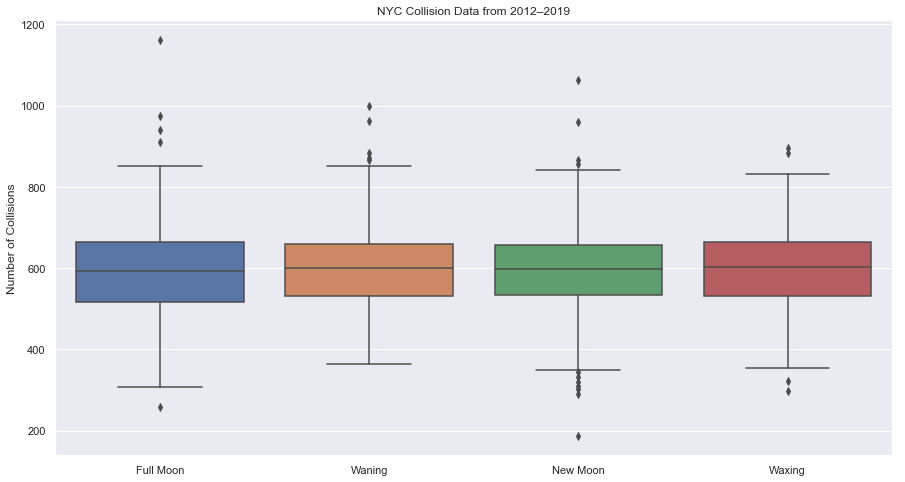

In [101]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x="phase", y="collisions", data=moondays, order=['Full Moon', 'Waning', 'New Moon', 'Waxing'])
plt.xlabel('')
plt.ylabel('Number of Collisions')
plt.title('NYC Collision Data from 2012–2019')
plt.savefig('images/boxplot-collisions-by-phase.png')

And check the ANOVA results from OLS

In [86]:
formula = 'collisions ~ C(phase)'
lm = ols(formula, moondays).fit()
table = sm.stats.anova_lm(lm, typ=2)
table

,sum_sq,df,F,PR(>F)
C(phase),1.787015e+04,3.0,0.587113,0.623442
Residual,2.560792e+07,2524.0,NaN,NaN


And plot the distributions. Nearly all identical in any interpretation!

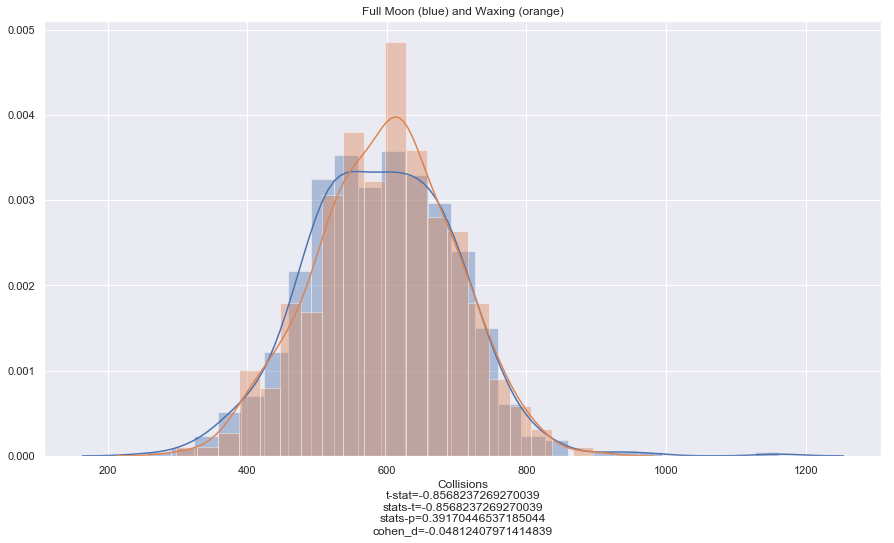

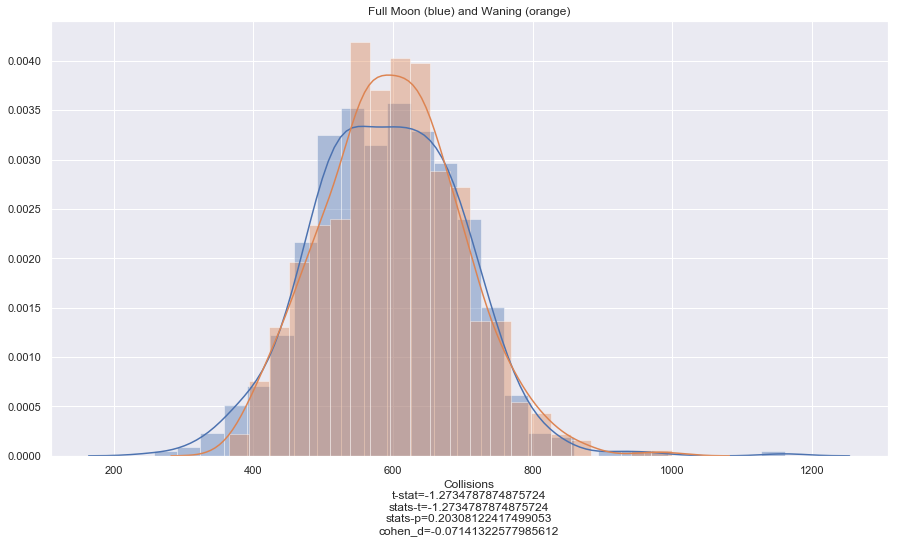

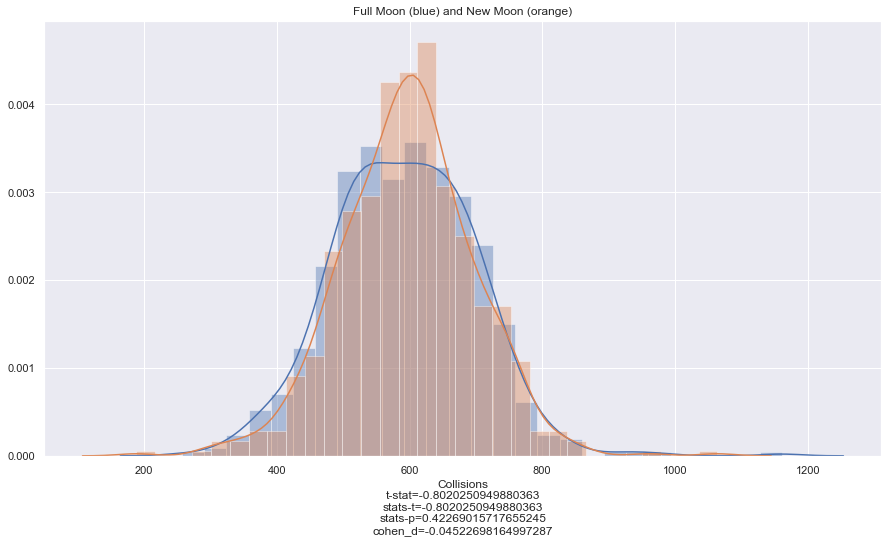

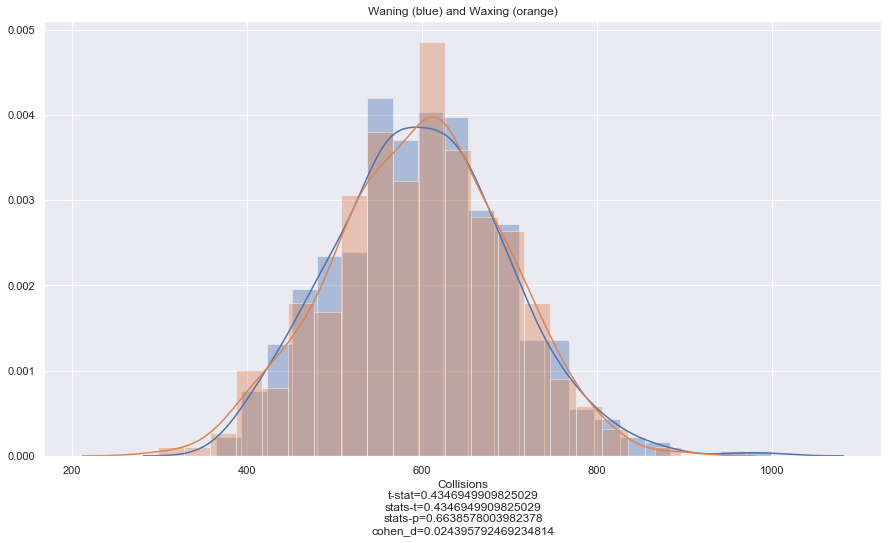

In [88]:
def distplot_moonpairs(pairs, df):
    for pair in pairs:
        filename = 'images/distplots/displot-collisions-by-' + pair[0] + '-' + pair[1] + '.png'
        day1 = df.loc[df['phase'] == pair[0], 'collisions']
        day2 = df.loc[df['phase'] == pair[1], 'collisions']
        t_stat = twosample_tstatistic(day1, day2)
        (stats_t, stats_p) = stats.ttest_ind(day1, day2)
        cd = Cohen_d(day1, day2)
        fig = plt.figure(figsize=(15,8))
        sns.set(rc={'figure.figsize':(12,10)})
        sns.distplot(day1)
        sns.distplot(day2)
        plt.xlabel('Collisions\nt-stat={}\nstats-t={}\nstats-p={}\ncohen_d={}'.format(t_stat, stats_t, stats_p, cd))
        plt.ylabel('')
        plt.title(pair[0] + ' (blue) and ' + pair[1] + ' (orange)')
        plt.savefig(filename)
        plt.show()
    
    
day_pairs = [['Full Moon', 'Waxing'], ['Full Moon', 'Waning'], ['Full Moon', 'New Moon'], ['Waning', 'Waxing']]
distplot_moonpairs(day_pairs, moondays)

# We are trying to identify if there is a difference in NY mortality rate and national mortality rate in 2016

## H0: NYC mortality rate has no relationship to national mortality

## H1: NYC mortality rate has a relationship to national mortality rate

### Statistical test: Chi Square test of homogeneity. 

#### Formula: 
##### Degree of Freedom: 
DF = (r - 1) * (c - 1), where r is the number of populations, and c is the number of levels for the categorical variable.
##### Expected frequency counts. 
The expected frequency counts are computed separately for each population at each level of the categorical variable, according to the following formula: Er,c = (nr * nc) / n
##### Test statistic.
The test statistic is a chi-square random variable (Χ2) defined by the following equation : Χ2 = Σ [ (Or,c - Er,c)2 / Er,c ] where Or,c is the observed frequency count in population r for level c of the categorical variable, and Er,c is the expected frequency count in population r for level c of the categorical variable.

US Total Death: 34,439
US Total Injured: 2,177,000



ALPHA = 0.05

In [2]:
import pandas as pd

In [14]:
traffic_df = pd.read_csv('traffic__moonphase_df.csv')
traffic_df = traffic_df.drop('Unnamed: 0', axis = 1)

In [15]:
traffic_12_17 = traffic_df.loc[ (traffic_df['DATE']>='2016-01-01') & (traffic_df['DATE']<='2016-12-31')]

In [16]:
traffic_12_17.columns

Index(['DATE', 'TIME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'MOONPHASE'],
      dtype='object')

In [17]:
traffic_12_17.head()

,DATE,TIME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,MOONPHASE
537239,2016-12-29,2019-06-07 12:34:00,0.0,0.0,0,0,0,0,0,0,New Moon
537444,2016-12-29,2019-06-07 15:30:00,0.0,0.0,0,0,0,0,0,0,New Moon
538869,2016-12-29,2019-06-07 07:40:00,0.0,0.0,0,0,0,0,0,0,New Moon
539066,2016-12-28,2019-06-07 20:13:00,3.0,1.0,0,1,0,0,3,0,Waning
539110,2016-12-27,2019-06-07 13:24:00,0.0,0.0,0,0,0,0,0,0,Waning


In [18]:
traffic_12_17.drop(['TIME','NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'MOONPHASE'],axis = 1, inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [19]:
traffic_12_17.sum()

DATE                         2016-12-292016-12-292016-12-292016-12-282016-1...
NUMBER OF PERSONS INJURED                                                60304
NUMBER OF PERSONS KILLED                                                   245
dtype: object

Calculating the sum of New York dead and injured.

In [20]:
ny_dead = traffic_12_17['NUMBER OF PERSONS KILLED'].sum()

In [21]:
ny_injured = traffic_12_17['NUMBER OF PERSONS INJURED'].sum()

In [22]:
us_dead = 34439 #statistic from NHTSA
us_injured = 2177000

In [23]:
degree_freedom = 1 #degree of freedom = (row-1)(column-1)

In [24]:
total_dead= us_dead+ny_dead #calculating total
total_injured = us_injured+ny_injured
total_ny = ny_dead+ny_injured
total_us = us_dead+us_injured
total = total_ny+total_us

In [25]:
p_dead =  total_dead/total #proportion of dead
p_dead

0.015265925700311798

In [26]:
p_injured= total_injured/total #proportion of injured
p_injured

0.9847340742996882

In [27]:
exp_dead_ny = total_ny*p_dead #calculating expected values 
exp_dead_ny
exp_injured_ny = total_ny*p_injured
exp_injured_ny

59624.66346477182

In [28]:
exp_dead_us = total_us*p_dead
exp_injured_us = total_us*p_injured

In [32]:
print(exp_dead_ny, exp_injured_ny, exp_dead_us, exp_injured_us)

924.3365352281791 59624.66346477182 33759.663464771824 2177679.336535228


In [29]:
chi_square = ((ny_dead-exp_dead_ny)**2/exp_dead_ny 
              +(ny_injured-exp_injured_ny)**2/exp_injured_ny 
              + (us_dead-exp_dead_us)**2/exp_dead_us
              +(us_injured-exp_injured_us)**2/exp_injured_us)

In [30]:
chi_square

520.897085560518

In [31]:
from scipy.stats.distributions import chi2
chi2.sf(chi_square,1)

2.700034846924345e-115

## References
### Project Write-Up Template
Credit to dair.ai with ❤️
* https://github.com/dair-ai/writing_data_scientists/blob/master/Writing_Primer_for_Data_Scientists.ipynb